For background, this analysis will try to figure out difference between  2 type of rental bike service which are 
member - considered as membership
causal - considered as one time user
The data is provided by Motivate International Inc.

The keys target is to find recommendation or insight for marketing to use for increasing conversion rate of casual user into member user.

Just to note for people who enter this analysis : 
since this is my first R analysis on the datasets, most of the code is not my original code but i try to figure out how it work on everyline. And also analysis resuslt is  my genuine insight from the data.

And for fellow google analystic learner, If you see this, these guy's analysis are worth checking: 

https://www.kaggle.com/code/jhelisonuchoa/google-data-analytics-capstone-case-study-1

https://www.kaggle.com/code/julenaranguren/cyclistic-bike-share-a-case-study/notebook


In [1]:
#Set up Phase

library(tidyverse)
library(readr)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#Preparation

Trip_raw_2020_Q1 <- read.csv("../input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2020_Q1.csv")
Trip_raw_2019_Q4 <- read.csv("../input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q4.csv")
Trip_raw_2019_Q3 <- read.csv("../input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q3.csv")
Trip_raw_2019_Q2 <- read.csv("../input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q2.csv")

In [3]:
#Check for table 

colnames(Trip_raw_2020_Q1)
colnames(Trip_raw_2019_Q4)
colnames(Trip_raw_2019_Q3)
colnames(Trip_raw_2019_Q2)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

In [4]:
##Change header : To follow 2020
q4_2019 <- rename(Trip_raw_2019_Q4
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype)

q3_2019 <- rename(Trip_raw_2019_Q3
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype)

q2_2019 <- rename(Trip_raw_2019_Q2
                   ,ride_id = X01...Rental.Details.Rental.ID
                   ,rideable_type = X01...Rental.Details.Bike.ID
                   ,started_at = X01...Rental.Details.Local.Start.Time  
                   ,ended_at = X01...Rental.Details.Local.End.Time  
                   ,start_station_name = X03...Rental.Start.Station.Name
                   ,start_station_id = X03...Rental.Start.Station.ID
                   ,end_station_name = X02...Rental.End.Station.Name
                   ,end_station_id = X02...Rental.End.Station.ID
                   ,member_casual = User.Type)
q1_2020 <- Trip_raw_2020_Q1

In [5]:
##Change data type in case of ride_id of old year is integer form.

q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
##Total files
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

In [6]:
##Clean total files
colnames(all_trips)
all_trips <- all_trips %>%  
  select(-c(X01...Rental.Details.Duration.In.Seconds.Uncapped, Member.Gender, X05...Member.Details.Member.Birthday.Year, tripduration, gender, birthyear, start_lat, start_lng, end_lat, end_lng))

table(all_trips$member_casual)
##Classified membership
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))
table(all_trips$member_casual)

[1] "ride_id"                                          
 [2] "started_at"                                       
 [3] "ended_at"                                         
 [4] "rideable_type"                                    
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "start_station_id"                                 
 [7] "start_station_name"                               
 [8] "end_station_id"                                   
 [9] "end_station_name"                                 
[10] "member_casual"                                    
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"        
[13] "tripduration"                                     
[14] "gender"                                           
[15] "birthyear"                                        
[16] "start_lat"                                        
[17] "start_lng"                                        
[18] "end_lat"                                          
[19] "end_lng"


    casual   Customer     member Subscriber 
     48480     857474     378407    2595461 


 casual  member 
 905954 2973868 

In [7]:
##Store Dates
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
##Trip Duration
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

##Clean version
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]
all_trips_v2 <- distinct(all_trips_v2)

In [8]:
#Analyze
summary(all_trips_v2$ride_length)
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
cp_average <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
print(cp_average)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

   all_trips_v2$member_casual all_trips_v2$day_of_week all_trips_v2$ride_length
1                      casual                   Sunday                3581.4054
2                      member                   Sunday                 919.9746
3                      casual                   Monday                3372.2869
4                      member                   Monday                 842.5726
5                      casual                  Tuesday                3596.3599
6                      member                  Tuesday                 826.1427
7                      casual                Wednesday                3718.6619
8                      member                Wednesday                 823.9996
9                      casual                 Thursday                3682.9847
10                     member                 Thursday                 823.9278
11                     casual                   Friday                3773.8351
12                     member           

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


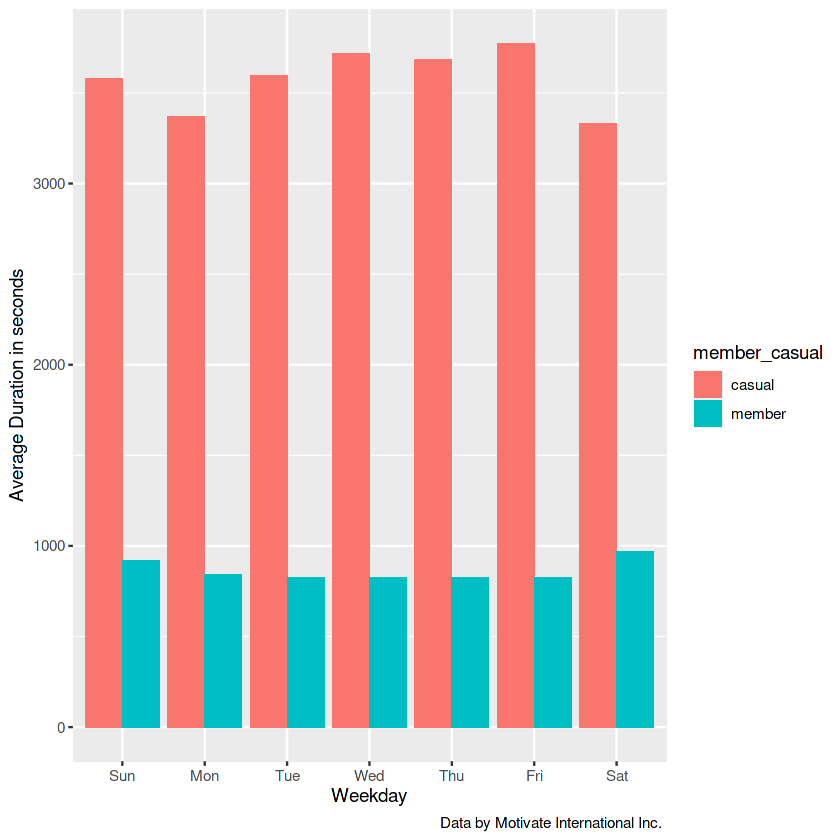

In [9]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Weekday", y = "Average Duration in seconds", caption = "Data by Motivate International Inc. ")   

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


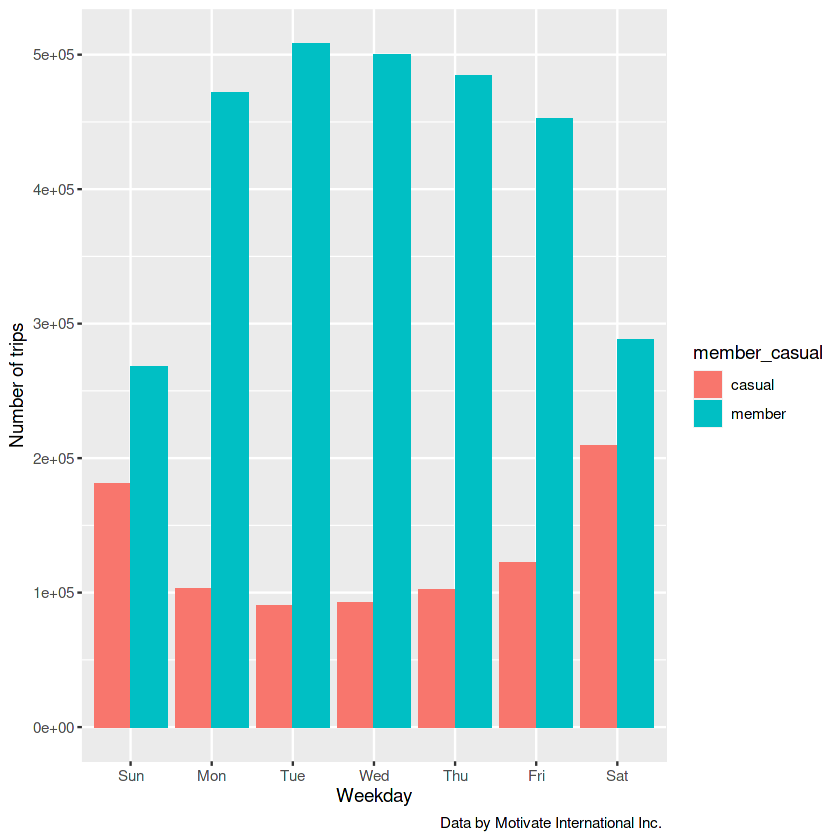

In [10]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) + 
  geom_col(position = "dodge") +
  labs(x = "Weekday", y = "Number of trips", caption = "Data by Motivate International Inc. ")  

From analysis results, 
* The average trip duration of casual user is a lot higher than member user on everyday of the week. The meaning of this resultmight lead to difference purpose of using such as casual user tend to use bike for touring and member user tend to use bike for their daily basis.
* The user amount of causal user are significantly increase on weekend.

**Futher needed analysis**

How many weekend user which is one-more time user (These group can change to membership group with differenct member ship plan


> This is end of my case study, It is pretty short due to shortage of my working time. However I am pretty enjoy this session, I hope you guys also enjoy!